In [100]:
import pandas as pd
import numpy as np
from iso3166 import countries_by_name
import seaborn as sns
import matplotlib.pyplot as plt

## Revealed Competitive Advantage

In [2]:
fname = 'https://raw.githubusercontent.com/QuantEcon/WAMS-2017/master/Matt/df/year_origin_sitc_rev2.csv'
df = pd.read_csv(fname)

In [11]:
df

,year,origin,sitc,export
0,1962,AFG,230,4000.0
1,1962,AFG,250,66000.0
2,1962,AFG,540,74000.0
3,1962,AFG,545,17000.0
4,1962,AFG,548,33000.0
...,...,...,...,...
3779902,2014,ZWE,9310,910055.0
3779903,2014,ZWE,9410,NaN
3779904,2014,ZWE,9510,NaN
3779905,2014,ZWE,9610,NaN


In [4]:
total_vol = df[["year", "origin", "export"]].groupby(["year", "origin"]).sum()

In [10]:
total_vol.loc[2000:2019]

export
year origin              
2000 ABW     1.655866e+09
     AFG     9.806462e+07
     AGO     7.134706e+09
     AIA     3.713320e+06
     ALB     2.645663e+08
...                   ...
2014 WSM     5.092161e+07
     YEM     2.416888e+09
     ZAF     9.061210e+10
     ZMB     9.687918e+09
     ZWE     3.063741e+09

[3145 rows x 1 columns]

In [13]:
df["cntry_export"] = df[["year", "origin", "export"]].groupby(by=["year", "origin"]).transform(sum)
df["prod_export"] = df[["year", "sitc", "export"]].groupby(by=["year", "sitc"]).transform(sum)
df["world_export"] = df[["year", "export"]].groupby(by=["year"]).transform(sum)
df["rca"] = (df["export"] / df["cntry_export"]) / (df["prod_export"] / df["world_export"])
df

,year,origin,sitc,export,cntry_export,prod_export,world_export,rca
0,1962,AFG,230,4000.0,8.613500e+07,4.385810e+08,1.428420e+11,0.015125
1,1962,AFG,250,66000.0,8.613500e+07,2.614480e+08,1.428420e+11,0.418634
2,1962,AFG,540,74000.0,8.613500e+07,4.892400e+07,1.428420e+11,2.508338
3,1962,AFG,545,17000.0,8.613500e+07,3.491880e+08,1.428420e+11,0.080736
4,1962,AFG,548,33000.0,8.613500e+07,8.512600e+07,1.428420e+11,0.642877
...,...,...,...,...,...,...,...,...
3779902,2014,ZWE,9310,910055.0,3.063741e+09,1.764567e+12,1.763851e+13,0.002969
3779903,2014,ZWE,9410,NaN,3.063741e+09,1.058101e+09,1.763851e+13,NaN
3779904,2014,ZWE,9510,NaN,3.063741e+09,9.870492e+09,1.763851e+13,NaN
3779905,2014,ZWE,9610,NaN,3.063741e+09,3.865394e+08,1.763851e+13,NaN


In [14]:
# produce yearly rca

rca = {}
for year in range(2000,2015):
    yr = df[df.year == year].set_index(['origin', 'sitc']).unstack('sitc')['rca']
    rca[year] = yr

In [61]:
# https://www.msci.com/developed-markets
# temp = pd.read_html(html)[0]
dm_countries = np.concatenate(temp.loc[1:].values)
dm_countries = dm_countries[~pd.isnull(dm_countries)]

In [37]:
codemap = {}
for k in em_countries:
    try:
        codemap[k] = countries_by_name[k.upper()].alpha3
    except:
        print(k)

Czech Republic
Iran
Russia
South Korea
Taiwan
Venezuela
nan


In [63]:
for k in dm_countries:
    try:
        codemap[k] = countries_by_name[k.upper()].alpha3
    except:
        print(k)

USA
United Kingdom


In [78]:
dm_countries

array(['Canada', 'Austria', 'Italy', 'Australia', 'USA', 'Belgium',
       'Netherlands', 'Hong Kong', 'Denmark', 'Norway', 'Japan',
       'Finland', 'Portugal', 'New Zealand', 'France', 'Spain',
       'Singapore', 'Germany', 'Sweden', 'Ireland', 'Switzerland',
       'Israel', 'United Kingdom'], dtype=object)

In [79]:
em_countries

['Argentina',
 'Bangladesh',
 'Brazil',
 'Bulgaria',
 'Chile',
 'China',
 'Colombia',
 'Czech Republic',
 'Egypt',
 'Greece',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Israel',
 'Kuwait',
 'Malaysia',
 'Mauritius',
 'Mexico',
 'Morocco',
 'Nigeria',
 'Oman',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'South Korea',
 'Taiwan',
 'Thailand',
 'Turkey',
 'Ukraine',
 'United Arab Emirates',
 'Venezuela',
 nan]

In [95]:
cntry = [codemap[k] for k in codemap]
rcacorr = {}
for yr in range(2000,2015):
    rcadf = rca[yr]
    rcacorr[yr] = rcadf[rcadf.index.isin(cntry)].T.corr()

<AxesSubplot:xlabel='origin', ylabel='origin'>

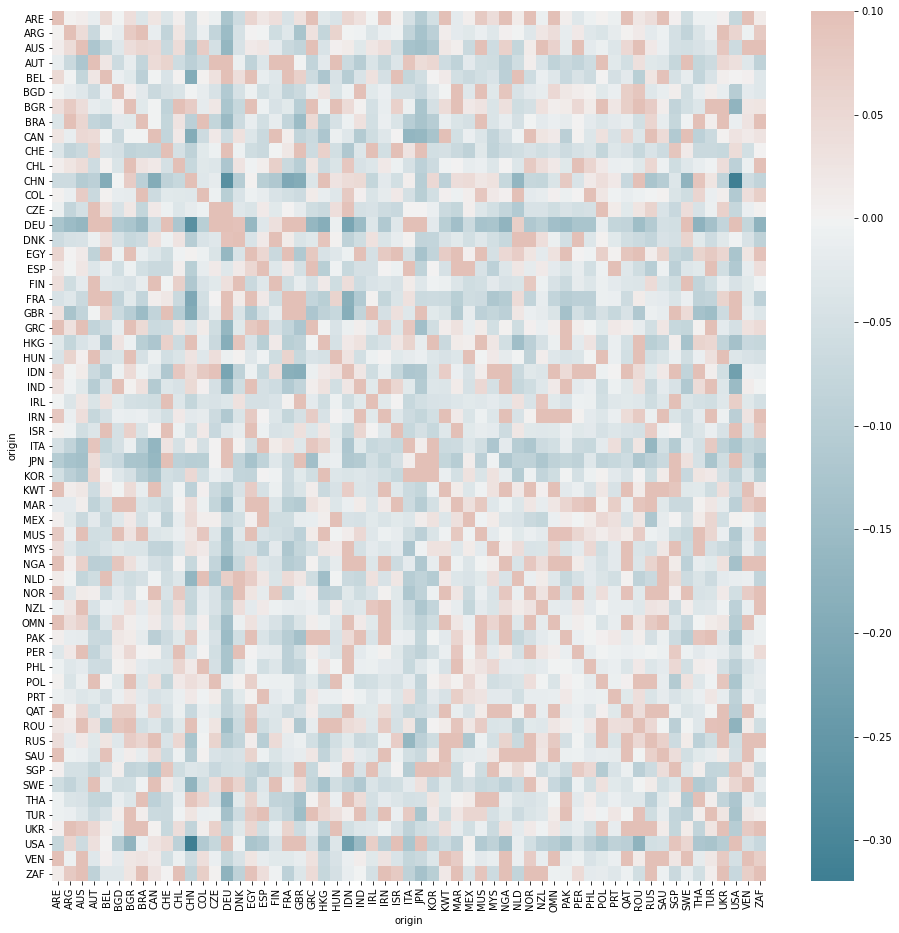

In [102]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig,ax = plt.subplots(figsize = (16,16))
sns.heatmap(rcacorr[2001],vmax=0.1, center = 0, cmap = cmap, ax = ax)